### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

### Function which plots loss, classification error and accuracy curves

In [2]:
def plot_train_results(X, Y, w, losses, class_errors, accs):

    iter_range = np.linspace(0, len(losses), 11)
    
    plt.plot(losses, 'b', label = 'loss')
    plt.xlabel('no of iters.')
    plt.ylabel('loss')
    plt.xticks(iter_range)
    plt.show()
    
    plt.plot(class_errors, 'b', label = 'classification error')
    plt.xlabel('no of iters.')
    plt.ylabel('classification error')
    plt.xticks(iter_range)
    plt.show()
    
    plt.plot(accs, 'b', label = 'accuracy')
    plt.xlabel('no of iters.')
    plt.ylabel('accuracy')
    plt.xticks(iter_range)
    plt.show()

### Code for perceptron learning algorithm

In [3]:
def perceptron(X, Y, num_iters):
    
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
    n = X.shape[0]
    w = np.zeros((X.shape[1], 1))
    
    loss = 0.
    losses = []
    class_error = 0.
    class_errors = []
    acc = 0.
    accs = []
    pred = None
    
    # Training
    for it in range(num_iters):
        loss = 0.
        class_error = 0.
        acc = 0
        for i in range(n):
            y = Y[i]
            x = X[i, :, None]
            
            if np.dot(w.T, x) >= 0:
                pred = 1
            else:
                pred = 0
            
            e = y - pred
            w = w + e * x
            
            loss += abs(e)
            class_error += abs(e)
            acc += (1 - abs(e))
        
        class_error /= n
        acc = (acc / n) * 100.
        
        losses.append(loss)
        class_errors.append(class_error)
        accs.append(acc)
    
    print("Weights: " + str(w))
    
    # Plotting
    plot_train_results(X, Y, w, losses, class_errors, accs)
    return w

### Evaluate the weights

In [4]:
def evaluate(X, Y, w):
    
    X = np.concatenate((X, np.ones((X.shape[0], 1))), axis = 1)
    
    n = X.shape[0]
    num_tp = 0
    num_tn = 0
    num_fp = 0
    num_fn = 0
    loss = 0.
    class_error = 0.
    acc = 0.
    pred = None
    
    for i in range(n):
        
        x = X[i, :, None]
        y = Y[i]
        
        if np.dot(w.T, x) >= 0:
            pred = 1
        else:
            pred = 0
        e = y - pred
        
        if e == 0:
            if y == 1:
                num_tp += 1
            else:
                num_tn += 1
        elif e == 1:
            num_fn += 1
        elif e == -1:
            num_fp += 1
        
        loss += abs(e)
        class_error += abs(e)
        acc += (1 - abs(e))
    
    class_error /= n
    acc = (acc / n) * 100.
    
    print("Loss: " + str(loss))
    print("Classification Error: " + str(class_error))
    print("Accuracy: " + str(acc) + "%")
    print("Total number of datapoints: " + str(n))
    print("No. True Positives: " + str(num_tp))
    print("No. True Negatives: " + str(num_tn))
    print("No. False Positives: " + str(num_fp))
    print("No. False Negatives: " + str(num_fn))

### Load Dataset

In [5]:
df = pd.read_csv('Dataset Question2.csv')

#### Train and Test Split

In [6]:
df_train, df_test = train_test_split(df, test_size = 0.2)

### Train using un-normalized data

In [7]:
X, Y = df_train.values[:, :df.shape[1] - 1], df_train.values[:, -1]

Weights: [[-198.239873]
 [-103.583948]
 [-120.961335]
 [ -14.439927]
 [ 195.      ]]


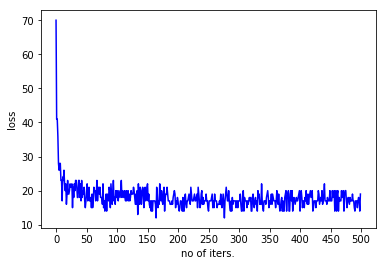

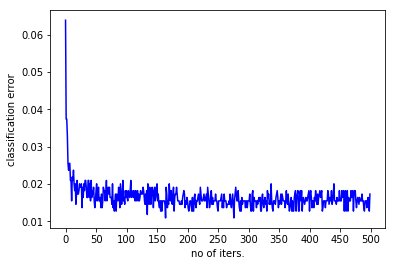

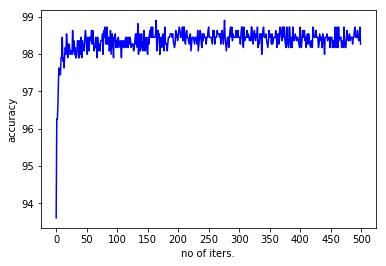

In [8]:
w = perceptron(X, Y, 500)

In [9]:
evaluate(X, Y, w)

Loss: 16.0
Classification Error: 0.014598540145985401
Accuracy: 98.54014598540147%
Total number of datapoints: 1096
No. True Positives: 479
No. True Negatives: 601
No. False Positives: 10
No. False Negatives: 6


### Test

In [10]:
X, Y = df_test.values[:, :df.shape[1] - 1], df_test.values[:, -1]
evaluate(X, Y, w)

Loss: 0.0
Classification Error: 0.0
Accuracy: 100.0%
Total number of datapoints: 275
No. True Positives: 125
No. True Negatives: 150
No. False Positives: 0
No. False Negatives: 0


### Results

- The perceptron algorithm was able to achieve a good training as well as test accuracy.
- We can observe that the model did not overfit the training data, instead it was able to generalize well on the test data.
- Although the algorithm was trained for 500 iterations, it required much less to learn most from the data. After learning what it could, the algorithm was trying to correctly classify the outlier points which resulted in the oscillation of the loss and accuracy curves.
- The results obtained were good even though we had not normalized the data, this is because the features did not have too much difference in their scales.

### Train using normalized data

In [11]:
X, Y = df_train.values[:, :df.shape[1] - 1], df_train.values[:, -1]
scaler.fit(X)
X = scaler.transform(X)

Weights: [[-37.16571267]
 [-37.18433636]
 [-41.68327487]
 [ -1.59909121]
 [ 52.        ]]


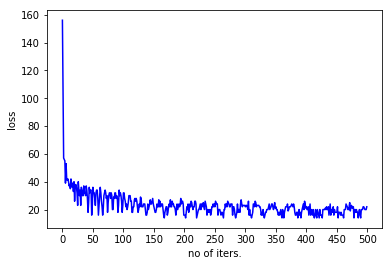

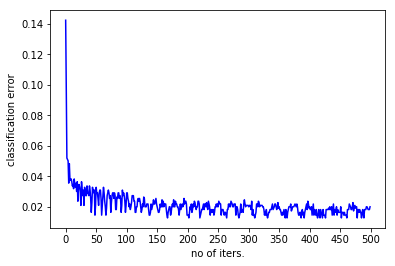

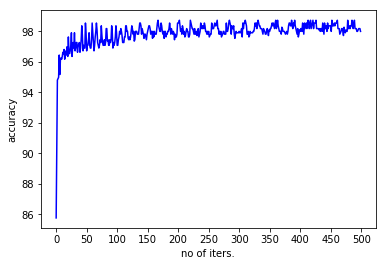

In [12]:
w = perceptron(X, Y, 500)

In [13]:
evaluate(X, Y, w)

Loss: 16.0
Classification Error: 0.014598540145985401
Accuracy: 98.54014598540147%
Total number of datapoints: 1096
No. True Positives: 481
No. True Negatives: 599
No. False Positives: 12
No. False Negatives: 4


### Test

In [14]:
X, Y = df_test.values[:, :df.shape[1] - 1], df_test.values[:, -1]
X = scaler.transform(X)

In [15]:
evaluate(X, Y, w)

Loss: 1.0
Classification Error: 0.0036363636363636364
Accuracy: 99.63636363636364%
Total number of datapoints: 275
No. True Positives: 125
No. True Negatives: 149
No. False Positives: 1
No. False Negatives: 0


### Results

- There was not much difference when we switched from the unnormalized form of the dataset to its normalized form. This can be explained as follows, the scales of the features of the data did not differ much hence learning was not affected much by scaling the features.
- But, when we observe the learning curves, the normalized version had a smoother plot, hence we may say that the the algorithm would have learnt the parameters earlier when the dataset was normalized (i.e. learning was easier and faster)
- In fact we can see that the test accuracy was lower for the normalized data (99.64%) as compared to the unnormalized data (100%).

### Conclusion

- The perceptron learning algorithm was able to perform well on this dataset in both its normalized and unnormalized version. The reason for this could be the fact that the data had the property of linear seperability in a higher dimension.
- The learning curves corresponding to the normalized data were smoother and hence suggest that learning was easier and faster.
- But as the accuracy of both version was similar, we can say that the data did not have much difference in the scales of its features.